In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src/data/')
sys.path.append('../src/models/')
sys.path.append('../src/features/')
sys.path.append('../src/visualization/')
# will reload any library
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from data.metrics import recall
from visualization.plot_utils import write_latex_table, summary_pooling_table, \
pooling_plots, pandas_settings, plot_settings,  save_result, glance_dict
# general
import pandas as pd
import numpy as np
from tqdm import tqdm
from features.tracks_info import TrackInfo
from collections import OrderedDict
from itertools import product
from data_utils import product_size
import matplotlib.pyplot as plt
import seaborn as sns
import compressed_pickle as cpick

plot_settings()
pandas_settings()

# create pooling model

In [3]:
turi2pop = cpick.load('../data/interim/popularity.pkl.bz2')
glance_dict(turi2pop)

{'0UaMYEvWZi0ZqiDOoHU3YI': 66.0,
 '6I9VzXrHxO9rA9A5euc8Ak': 78.0,
 '0WqIKmW4BTrj3eJFmnCKMv': 60.0}

/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


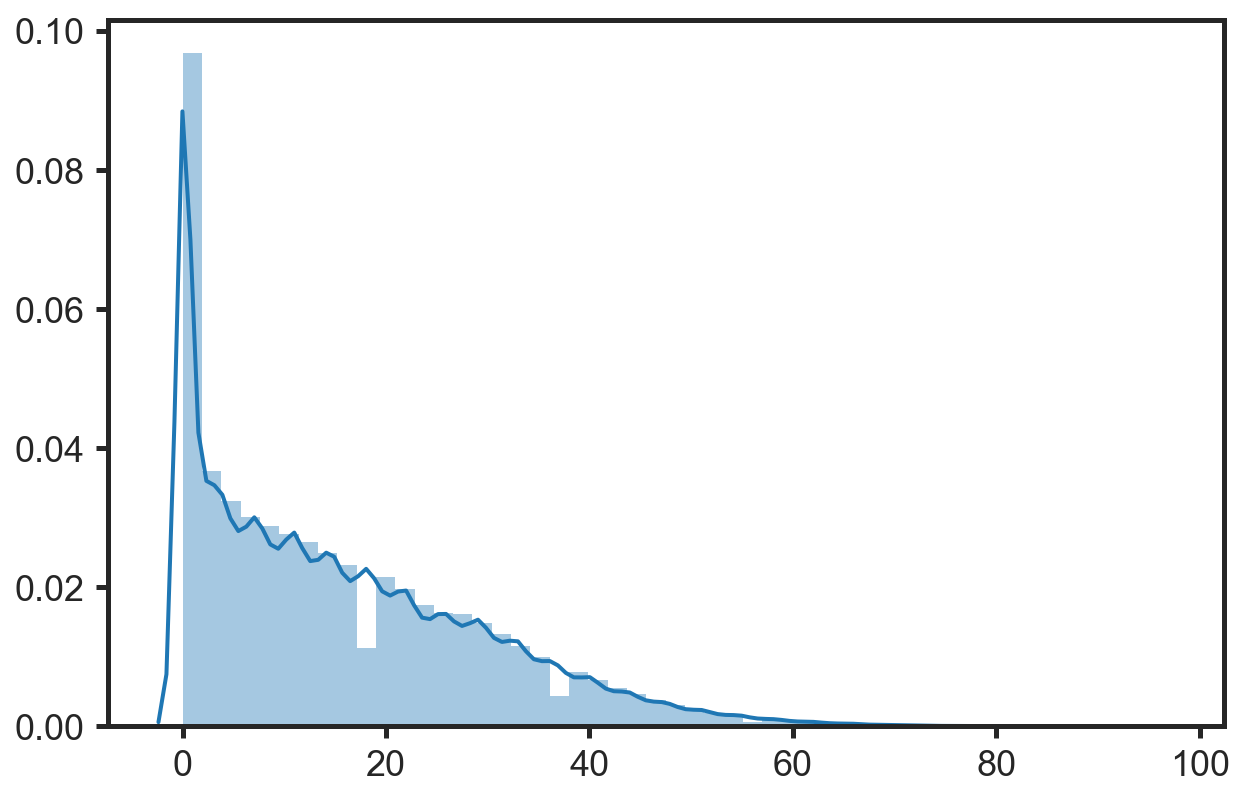

In [7]:
pop = list([p for p in turi2pop.values() if not np.isnan(p)])
sns.distplot(pop)

## prune and vectorize words

In [15]:
p_bins = pd.qcut(np.array(pop), 8,labels=False,duplicates='drop')
print(set(p_bins))


{0, 1, 2, 3, 4, 5, 6}


In [45]:
from gensim import corpora
texts = [val for val in turi2genres.values()]
## remove words that appear only once
#from collections import defaultdict
#frequency = defaultdict(int)
#for text in texts:
#    for token in text:
#        frequency[token] += 1

#texts = [[token for token in text if frequency[token] > 1] for text in texts]

## dictionary and mm data

In [46]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save('genres.dict')
print(glance_dict(dictionary.token2id,10))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('genres.mm', corpus)

2018-05-04 05:36:03,893 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-04 05:36:04,017 : INFO : adding document #10000 to Dictionary(766 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,109 : INFO : adding document #20000 to Dictionary(931 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,201 : INFO : adding document #30000 to Dictionary(1022 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,287 : INFO : adding document #40000 to Dictionary(1084 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,374 : INFO : adding document #50000 to Dictionary(1138 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,469 : INFO : adding document #60000 to Dictionary(1192 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:04,562 : I

2018-05-04 05:36:08,815 : INFO : adding document #560000 to Dictionary(1627 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:08,896 : INFO : adding document #570000 to Dictionary(1631 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:08,977 : INFO : adding document #580000 to Dictionary(1634 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:09,058 : INFO : adding document #590000 to Dictionary(1636 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:09,132 : INFO : adding document #600000 to Dictionary(1637 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:09,209 : INFO : adding document #610000 to Dictionary(1638 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:09,291 : INFO : adding document #620000 to Dictionary(1642 unique tokens: ['dance pop', '

2018-05-04 05:36:13,367 : INFO : adding document #1110000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,448 : INFO : adding document #1120000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,519 : INFO : adding document #1130000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,592 : INFO : adding document #1140000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,666 : INFO : adding document #1150000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,740 : INFO : adding document #1160000 to Dictionary(1679 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:13,817 : INFO : adding document #1170000 to Dictionary(1679 unique tokens: ['dance 

2018-05-04 05:36:17,621 : INFO : adding document #1660000 to Dictionary(1684 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:17,698 : INFO : adding document #1670000 to Dictionary(1684 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:17,776 : INFO : adding document #1680000 to Dictionary(1684 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:17,842 : INFO : adding document #1690000 to Dictionary(1685 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:17,918 : INFO : adding document #1700000 to Dictionary(1685 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:17,997 : INFO : adding document #1710000 to Dictionary(1685 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:18,079 : INFO : adding document #1720000 to Dictionary(1685 unique tokens: ['dance 

2018-05-04 05:36:21,761 : INFO : adding document #2210000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:21,822 : INFO : adding document #2220000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:21,889 : INFO : adding document #2230000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:21,961 : INFO : adding document #2240000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:22,031 : INFO : adding document #2250000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:22,099 : INFO : adding document #2260000 to Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip pop', 'pop', 'pop rap']...)
2018-05-04 05:36:22,117 : INFO : built Dictionary(1686 unique tokens: ['dance pop', 'hip hop', 'hip 

{'dance pop': 0, 'hip hop': 1, 'hip pop': 2, 'pop': 3, 'pop rap': 4, 'r&b': 5, 'southern hip hop': 6, 'urban contemporary': 7, 'post-teen pop': 8, 'reggae fusion': 9}


2018-05-04 05:36:33,884 : INFO : storing corpus in Matrix Market format to genres.mm
2018-05-04 05:36:33,891 : INFO : saving sparse matrix to genres.mm
2018-05-04 05:36:33,892 : INFO : PROGRESS: saving document #0
2018-05-04 05:36:33,906 : INFO : PROGRESS: saving document #1000
2018-05-04 05:36:33,917 : INFO : PROGRESS: saving document #2000
2018-05-04 05:36:33,931 : INFO : PROGRESS: saving document #3000
2018-05-04 05:36:33,946 : INFO : PROGRESS: saving document #4000
2018-05-04 05:36:33,958 : INFO : PROGRESS: saving document #5000
2018-05-04 05:36:33,969 : INFO : PROGRESS: saving document #6000
2018-05-04 05:36:33,981 : INFO : PROGRESS: saving document #7000
2018-05-04 05:36:33,993 : INFO : PROGRESS: saving document #8000
2018-05-04 05:36:34,008 : INFO : PROGRESS: saving document #9000
2018-05-04 05:36:34,022 : INFO : PROGRESS: saving document #10000
2018-05-04 05:36:34,033 : INFO : PROGRESS: saving document #11000
2018-05-04 05:36:34,047 : INFO : PROGRESS: saving document #12000
201

2018-05-04 05:36:35,098 : INFO : PROGRESS: saving document #122000
2018-05-04 05:36:35,108 : INFO : PROGRESS: saving document #123000
2018-05-04 05:36:35,117 : INFO : PROGRESS: saving document #124000
2018-05-04 05:36:35,124 : INFO : PROGRESS: saving document #125000
2018-05-04 05:36:35,132 : INFO : PROGRESS: saving document #126000
2018-05-04 05:36:35,142 : INFO : PROGRESS: saving document #127000
2018-05-04 05:36:35,151 : INFO : PROGRESS: saving document #128000
2018-05-04 05:36:35,161 : INFO : PROGRESS: saving document #129000
2018-05-04 05:36:35,169 : INFO : PROGRESS: saving document #130000
2018-05-04 05:36:35,177 : INFO : PROGRESS: saving document #131000
2018-05-04 05:36:35,187 : INFO : PROGRESS: saving document #132000
2018-05-04 05:36:35,196 : INFO : PROGRESS: saving document #133000
2018-05-04 05:36:35,203 : INFO : PROGRESS: saving document #134000
2018-05-04 05:36:35,210 : INFO : PROGRESS: saving document #135000
2018-05-04 05:36:35,217 : INFO : PROGRESS: saving document #13

2018-05-04 05:36:36,188 : INFO : PROGRESS: saving document #245000
2018-05-04 05:36:36,195 : INFO : PROGRESS: saving document #246000
2018-05-04 05:36:36,203 : INFO : PROGRESS: saving document #247000
2018-05-04 05:36:36,212 : INFO : PROGRESS: saving document #248000
2018-05-04 05:36:36,222 : INFO : PROGRESS: saving document #249000
2018-05-04 05:36:36,231 : INFO : PROGRESS: saving document #250000
2018-05-04 05:36:36,241 : INFO : PROGRESS: saving document #251000
2018-05-04 05:36:36,248 : INFO : PROGRESS: saving document #252000
2018-05-04 05:36:36,259 : INFO : PROGRESS: saving document #253000
2018-05-04 05:36:36,269 : INFO : PROGRESS: saving document #254000
2018-05-04 05:36:36,278 : INFO : PROGRESS: saving document #255000
2018-05-04 05:36:36,286 : INFO : PROGRESS: saving document #256000
2018-05-04 05:36:36,296 : INFO : PROGRESS: saving document #257000
2018-05-04 05:36:36,304 : INFO : PROGRESS: saving document #258000
2018-05-04 05:36:36,314 : INFO : PROGRESS: saving document #25

2018-05-04 05:36:37,337 : INFO : PROGRESS: saving document #368000
2018-05-04 05:36:37,346 : INFO : PROGRESS: saving document #369000
2018-05-04 05:36:37,353 : INFO : PROGRESS: saving document #370000
2018-05-04 05:36:37,361 : INFO : PROGRESS: saving document #371000
2018-05-04 05:36:37,368 : INFO : PROGRESS: saving document #372000
2018-05-04 05:36:37,376 : INFO : PROGRESS: saving document #373000
2018-05-04 05:36:37,384 : INFO : PROGRESS: saving document #374000
2018-05-04 05:36:37,392 : INFO : PROGRESS: saving document #375000
2018-05-04 05:36:37,400 : INFO : PROGRESS: saving document #376000
2018-05-04 05:36:37,410 : INFO : PROGRESS: saving document #377000
2018-05-04 05:36:37,419 : INFO : PROGRESS: saving document #378000
2018-05-04 05:36:37,428 : INFO : PROGRESS: saving document #379000
2018-05-04 05:36:37,438 : INFO : PROGRESS: saving document #380000
2018-05-04 05:36:37,447 : INFO : PROGRESS: saving document #381000
2018-05-04 05:36:37,456 : INFO : PROGRESS: saving document #38

2018-05-04 05:36:38,555 : INFO : PROGRESS: saving document #491000
2018-05-04 05:36:38,567 : INFO : PROGRESS: saving document #492000
2018-05-04 05:36:38,580 : INFO : PROGRESS: saving document #493000
2018-05-04 05:36:38,591 : INFO : PROGRESS: saving document #494000
2018-05-04 05:36:38,600 : INFO : PROGRESS: saving document #495000
2018-05-04 05:36:38,610 : INFO : PROGRESS: saving document #496000
2018-05-04 05:36:38,618 : INFO : PROGRESS: saving document #497000
2018-05-04 05:36:38,629 : INFO : PROGRESS: saving document #498000
2018-05-04 05:36:38,638 : INFO : PROGRESS: saving document #499000
2018-05-04 05:36:38,646 : INFO : PROGRESS: saving document #500000
2018-05-04 05:36:38,654 : INFO : PROGRESS: saving document #501000
2018-05-04 05:36:38,665 : INFO : PROGRESS: saving document #502000
2018-05-04 05:36:38,673 : INFO : PROGRESS: saving document #503000
2018-05-04 05:36:38,680 : INFO : PROGRESS: saving document #504000
2018-05-04 05:36:38,687 : INFO : PROGRESS: saving document #50

2018-05-04 05:36:39,724 : INFO : PROGRESS: saving document #614000
2018-05-04 05:36:39,736 : INFO : PROGRESS: saving document #615000
2018-05-04 05:36:39,746 : INFO : PROGRESS: saving document #616000
2018-05-04 05:36:39,756 : INFO : PROGRESS: saving document #617000
2018-05-04 05:36:39,768 : INFO : PROGRESS: saving document #618000
2018-05-04 05:36:39,779 : INFO : PROGRESS: saving document #619000
2018-05-04 05:36:39,787 : INFO : PROGRESS: saving document #620000
2018-05-04 05:36:39,794 : INFO : PROGRESS: saving document #621000
2018-05-04 05:36:39,802 : INFO : PROGRESS: saving document #622000
2018-05-04 05:36:39,810 : INFO : PROGRESS: saving document #623000
2018-05-04 05:36:39,820 : INFO : PROGRESS: saving document #624000
2018-05-04 05:36:39,827 : INFO : PROGRESS: saving document #625000
2018-05-04 05:36:39,835 : INFO : PROGRESS: saving document #626000
2018-05-04 05:36:39,844 : INFO : PROGRESS: saving document #627000
2018-05-04 05:36:39,852 : INFO : PROGRESS: saving document #62

2018-05-04 05:36:40,834 : INFO : PROGRESS: saving document #737000
2018-05-04 05:36:40,844 : INFO : PROGRESS: saving document #738000
2018-05-04 05:36:40,850 : INFO : PROGRESS: saving document #739000
2018-05-04 05:36:40,857 : INFO : PROGRESS: saving document #740000
2018-05-04 05:36:40,865 : INFO : PROGRESS: saving document #741000
2018-05-04 05:36:40,873 : INFO : PROGRESS: saving document #742000
2018-05-04 05:36:40,880 : INFO : PROGRESS: saving document #743000
2018-05-04 05:36:40,887 : INFO : PROGRESS: saving document #744000
2018-05-04 05:36:40,895 : INFO : PROGRESS: saving document #745000
2018-05-04 05:36:40,903 : INFO : PROGRESS: saving document #746000
2018-05-04 05:36:40,911 : INFO : PROGRESS: saving document #747000
2018-05-04 05:36:40,919 : INFO : PROGRESS: saving document #748000
2018-05-04 05:36:40,927 : INFO : PROGRESS: saving document #749000
2018-05-04 05:36:40,935 : INFO : PROGRESS: saving document #750000
2018-05-04 05:36:40,944 : INFO : PROGRESS: saving document #75

2018-05-04 05:36:41,902 : INFO : PROGRESS: saving document #860000
2018-05-04 05:36:41,912 : INFO : PROGRESS: saving document #861000
2018-05-04 05:36:41,920 : INFO : PROGRESS: saving document #862000
2018-05-04 05:36:41,929 : INFO : PROGRESS: saving document #863000
2018-05-04 05:36:41,937 : INFO : PROGRESS: saving document #864000
2018-05-04 05:36:41,944 : INFO : PROGRESS: saving document #865000
2018-05-04 05:36:41,953 : INFO : PROGRESS: saving document #866000
2018-05-04 05:36:41,963 : INFO : PROGRESS: saving document #867000
2018-05-04 05:36:41,971 : INFO : PROGRESS: saving document #868000
2018-05-04 05:36:41,979 : INFO : PROGRESS: saving document #869000
2018-05-04 05:36:41,987 : INFO : PROGRESS: saving document #870000
2018-05-04 05:36:41,995 : INFO : PROGRESS: saving document #871000
2018-05-04 05:36:42,002 : INFO : PROGRESS: saving document #872000
2018-05-04 05:36:42,012 : INFO : PROGRESS: saving document #873000
2018-05-04 05:36:42,022 : INFO : PROGRESS: saving document #87

2018-05-04 05:36:42,948 : INFO : PROGRESS: saving document #983000
2018-05-04 05:36:42,956 : INFO : PROGRESS: saving document #984000
2018-05-04 05:36:42,964 : INFO : PROGRESS: saving document #985000
2018-05-04 05:36:42,976 : INFO : PROGRESS: saving document #986000
2018-05-04 05:36:42,988 : INFO : PROGRESS: saving document #987000
2018-05-04 05:36:42,995 : INFO : PROGRESS: saving document #988000
2018-05-04 05:36:43,002 : INFO : PROGRESS: saving document #989000
2018-05-04 05:36:43,011 : INFO : PROGRESS: saving document #990000
2018-05-04 05:36:43,021 : INFO : PROGRESS: saving document #991000
2018-05-04 05:36:43,029 : INFO : PROGRESS: saving document #992000
2018-05-04 05:36:43,034 : INFO : PROGRESS: saving document #993000
2018-05-04 05:36:43,044 : INFO : PROGRESS: saving document #994000
2018-05-04 05:36:43,052 : INFO : PROGRESS: saving document #995000
2018-05-04 05:36:43,062 : INFO : PROGRESS: saving document #996000
2018-05-04 05:36:43,069 : INFO : PROGRESS: saving document #99

2018-05-04 05:36:43,961 : INFO : PROGRESS: saving document #1104000
2018-05-04 05:36:43,967 : INFO : PROGRESS: saving document #1105000
2018-05-04 05:36:43,973 : INFO : PROGRESS: saving document #1106000
2018-05-04 05:36:43,980 : INFO : PROGRESS: saving document #1107000
2018-05-04 05:36:43,986 : INFO : PROGRESS: saving document #1108000
2018-05-04 05:36:43,998 : INFO : PROGRESS: saving document #1109000
2018-05-04 05:36:44,010 : INFO : PROGRESS: saving document #1110000
2018-05-04 05:36:44,021 : INFO : PROGRESS: saving document #1111000
2018-05-04 05:36:44,030 : INFO : PROGRESS: saving document #1112000
2018-05-04 05:36:44,038 : INFO : PROGRESS: saving document #1113000
2018-05-04 05:36:44,050 : INFO : PROGRESS: saving document #1114000
2018-05-04 05:36:44,061 : INFO : PROGRESS: saving document #1115000
2018-05-04 05:36:44,069 : INFO : PROGRESS: saving document #1116000
2018-05-04 05:36:44,075 : INFO : PROGRESS: saving document #1117000
2018-05-04 05:36:44,082 : INFO : PROGRESS: savin

2018-05-04 05:36:45,023 : INFO : PROGRESS: saving document #1225000
2018-05-04 05:36:45,030 : INFO : PROGRESS: saving document #1226000
2018-05-04 05:36:45,041 : INFO : PROGRESS: saving document #1227000
2018-05-04 05:36:45,048 : INFO : PROGRESS: saving document #1228000
2018-05-04 05:36:45,059 : INFO : PROGRESS: saving document #1229000
2018-05-04 05:36:45,067 : INFO : PROGRESS: saving document #1230000
2018-05-04 05:36:45,073 : INFO : PROGRESS: saving document #1231000
2018-05-04 05:36:45,083 : INFO : PROGRESS: saving document #1232000
2018-05-04 05:36:45,096 : INFO : PROGRESS: saving document #1233000
2018-05-04 05:36:45,107 : INFO : PROGRESS: saving document #1234000
2018-05-04 05:36:45,115 : INFO : PROGRESS: saving document #1235000
2018-05-04 05:36:45,131 : INFO : PROGRESS: saving document #1236000
2018-05-04 05:36:45,141 : INFO : PROGRESS: saving document #1237000
2018-05-04 05:36:45,149 : INFO : PROGRESS: saving document #1238000
2018-05-04 05:36:45,156 : INFO : PROGRESS: savin

2018-05-04 05:36:46,014 : INFO : PROGRESS: saving document #1346000
2018-05-04 05:36:46,024 : INFO : PROGRESS: saving document #1347000
2018-05-04 05:36:46,030 : INFO : PROGRESS: saving document #1348000
2018-05-04 05:36:46,039 : INFO : PROGRESS: saving document #1349000
2018-05-04 05:36:46,046 : INFO : PROGRESS: saving document #1350000
2018-05-04 05:36:46,053 : INFO : PROGRESS: saving document #1351000
2018-05-04 05:36:46,061 : INFO : PROGRESS: saving document #1352000
2018-05-04 05:36:46,069 : INFO : PROGRESS: saving document #1353000
2018-05-04 05:36:46,081 : INFO : PROGRESS: saving document #1354000
2018-05-04 05:36:46,091 : INFO : PROGRESS: saving document #1355000
2018-05-04 05:36:46,098 : INFO : PROGRESS: saving document #1356000
2018-05-04 05:36:46,104 : INFO : PROGRESS: saving document #1357000
2018-05-04 05:36:46,115 : INFO : PROGRESS: saving document #1358000
2018-05-04 05:36:46,124 : INFO : PROGRESS: saving document #1359000
2018-05-04 05:36:46,131 : INFO : PROGRESS: savin

2018-05-04 05:36:47,070 : INFO : PROGRESS: saving document #1467000
2018-05-04 05:36:47,079 : INFO : PROGRESS: saving document #1468000
2018-05-04 05:36:47,089 : INFO : PROGRESS: saving document #1469000
2018-05-04 05:36:47,097 : INFO : PROGRESS: saving document #1470000
2018-05-04 05:36:47,110 : INFO : PROGRESS: saving document #1471000
2018-05-04 05:36:47,119 : INFO : PROGRESS: saving document #1472000
2018-05-04 05:36:47,128 : INFO : PROGRESS: saving document #1473000
2018-05-04 05:36:47,139 : INFO : PROGRESS: saving document #1474000
2018-05-04 05:36:47,150 : INFO : PROGRESS: saving document #1475000
2018-05-04 05:36:47,160 : INFO : PROGRESS: saving document #1476000
2018-05-04 05:36:47,170 : INFO : PROGRESS: saving document #1477000
2018-05-04 05:36:47,180 : INFO : PROGRESS: saving document #1478000
2018-05-04 05:36:47,190 : INFO : PROGRESS: saving document #1479000
2018-05-04 05:36:47,198 : INFO : PROGRESS: saving document #1480000
2018-05-04 05:36:47,209 : INFO : PROGRESS: savin

2018-05-04 05:36:48,142 : INFO : PROGRESS: saving document #1588000
2018-05-04 05:36:48,151 : INFO : PROGRESS: saving document #1589000
2018-05-04 05:36:48,159 : INFO : PROGRESS: saving document #1590000
2018-05-04 05:36:48,165 : INFO : PROGRESS: saving document #1591000
2018-05-04 05:36:48,175 : INFO : PROGRESS: saving document #1592000
2018-05-04 05:36:48,183 : INFO : PROGRESS: saving document #1593000
2018-05-04 05:36:48,190 : INFO : PROGRESS: saving document #1594000
2018-05-04 05:36:48,200 : INFO : PROGRESS: saving document #1595000
2018-05-04 05:36:48,212 : INFO : PROGRESS: saving document #1596000
2018-05-04 05:36:48,220 : INFO : PROGRESS: saving document #1597000
2018-05-04 05:36:48,229 : INFO : PROGRESS: saving document #1598000
2018-05-04 05:36:48,237 : INFO : PROGRESS: saving document #1599000
2018-05-04 05:36:48,247 : INFO : PROGRESS: saving document #1600000
2018-05-04 05:36:48,258 : INFO : PROGRESS: saving document #1601000
2018-05-04 05:36:48,266 : INFO : PROGRESS: savin

2018-05-04 05:36:49,169 : INFO : PROGRESS: saving document #1709000
2018-05-04 05:36:49,176 : INFO : PROGRESS: saving document #1710000
2018-05-04 05:36:49,183 : INFO : PROGRESS: saving document #1711000
2018-05-04 05:36:49,190 : INFO : PROGRESS: saving document #1712000
2018-05-04 05:36:49,196 : INFO : PROGRESS: saving document #1713000
2018-05-04 05:36:49,203 : INFO : PROGRESS: saving document #1714000
2018-05-04 05:36:49,209 : INFO : PROGRESS: saving document #1715000
2018-05-04 05:36:49,217 : INFO : PROGRESS: saving document #1716000
2018-05-04 05:36:49,226 : INFO : PROGRESS: saving document #1717000
2018-05-04 05:36:49,232 : INFO : PROGRESS: saving document #1718000
2018-05-04 05:36:49,240 : INFO : PROGRESS: saving document #1719000
2018-05-04 05:36:49,248 : INFO : PROGRESS: saving document #1720000
2018-05-04 05:36:49,256 : INFO : PROGRESS: saving document #1721000
2018-05-04 05:36:49,264 : INFO : PROGRESS: saving document #1722000
2018-05-04 05:36:49,273 : INFO : PROGRESS: savin

2018-05-04 05:36:50,142 : INFO : PROGRESS: saving document #1830000
2018-05-04 05:36:50,149 : INFO : PROGRESS: saving document #1831000
2018-05-04 05:36:50,157 : INFO : PROGRESS: saving document #1832000
2018-05-04 05:36:50,163 : INFO : PROGRESS: saving document #1833000
2018-05-04 05:36:50,170 : INFO : PROGRESS: saving document #1834000
2018-05-04 05:36:50,177 : INFO : PROGRESS: saving document #1835000
2018-05-04 05:36:50,183 : INFO : PROGRESS: saving document #1836000
2018-05-04 05:36:50,190 : INFO : PROGRESS: saving document #1837000
2018-05-04 05:36:50,197 : INFO : PROGRESS: saving document #1838000
2018-05-04 05:36:50,203 : INFO : PROGRESS: saving document #1839000
2018-05-04 05:36:50,215 : INFO : PROGRESS: saving document #1840000
2018-05-04 05:36:50,223 : INFO : PROGRESS: saving document #1841000
2018-05-04 05:36:50,230 : INFO : PROGRESS: saving document #1842000
2018-05-04 05:36:50,242 : INFO : PROGRESS: saving document #1843000
2018-05-04 05:36:50,253 : INFO : PROGRESS: savin

2018-05-04 05:36:50,998 : INFO : PROGRESS: saving document #1951000
2018-05-04 05:36:51,004 : INFO : PROGRESS: saving document #1952000
2018-05-04 05:36:51,011 : INFO : PROGRESS: saving document #1953000
2018-05-04 05:36:51,020 : INFO : PROGRESS: saving document #1954000
2018-05-04 05:36:51,028 : INFO : PROGRESS: saving document #1955000
2018-05-04 05:36:51,034 : INFO : PROGRESS: saving document #1956000
2018-05-04 05:36:51,041 : INFO : PROGRESS: saving document #1957000
2018-05-04 05:36:51,048 : INFO : PROGRESS: saving document #1958000
2018-05-04 05:36:51,055 : INFO : PROGRESS: saving document #1959000
2018-05-04 05:36:51,064 : INFO : PROGRESS: saving document #1960000
2018-05-04 05:36:51,071 : INFO : PROGRESS: saving document #1961000
2018-05-04 05:36:51,078 : INFO : PROGRESS: saving document #1962000
2018-05-04 05:36:51,085 : INFO : PROGRESS: saving document #1963000
2018-05-04 05:36:51,093 : INFO : PROGRESS: saving document #1964000
2018-05-04 05:36:51,100 : INFO : PROGRESS: savin

2018-05-04 05:36:51,893 : INFO : PROGRESS: saving document #2072000
2018-05-04 05:36:51,903 : INFO : PROGRESS: saving document #2073000
2018-05-04 05:36:51,911 : INFO : PROGRESS: saving document #2074000
2018-05-04 05:36:51,922 : INFO : PROGRESS: saving document #2075000
2018-05-04 05:36:51,931 : INFO : PROGRESS: saving document #2076000
2018-05-04 05:36:51,940 : INFO : PROGRESS: saving document #2077000
2018-05-04 05:36:51,950 : INFO : PROGRESS: saving document #2078000
2018-05-04 05:36:51,958 : INFO : PROGRESS: saving document #2079000
2018-05-04 05:36:51,965 : INFO : PROGRESS: saving document #2080000
2018-05-04 05:36:51,974 : INFO : PROGRESS: saving document #2081000
2018-05-04 05:36:51,982 : INFO : PROGRESS: saving document #2082000
2018-05-04 05:36:51,990 : INFO : PROGRESS: saving document #2083000
2018-05-04 05:36:51,998 : INFO : PROGRESS: saving document #2084000
2018-05-04 05:36:52,005 : INFO : PROGRESS: saving document #2085000
2018-05-04 05:36:52,012 : INFO : PROGRESS: savin

2018-05-04 05:36:52,786 : INFO : PROGRESS: saving document #2193000
2018-05-04 05:36:52,792 : INFO : PROGRESS: saving document #2194000
2018-05-04 05:36:52,797 : INFO : PROGRESS: saving document #2195000
2018-05-04 05:36:52,803 : INFO : PROGRESS: saving document #2196000
2018-05-04 05:36:52,809 : INFO : PROGRESS: saving document #2197000
2018-05-04 05:36:52,821 : INFO : PROGRESS: saving document #2198000
2018-05-04 05:36:52,829 : INFO : PROGRESS: saving document #2199000
2018-05-04 05:36:52,836 : INFO : PROGRESS: saving document #2200000
2018-05-04 05:36:52,842 : INFO : PROGRESS: saving document #2201000
2018-05-04 05:36:52,849 : INFO : PROGRESS: saving document #2202000
2018-05-04 05:36:52,855 : INFO : PROGRESS: saving document #2203000
2018-05-04 05:36:52,861 : INFO : PROGRESS: saving document #2204000
2018-05-04 05:36:52,870 : INFO : PROGRESS: saving document #2205000
2018-05-04 05:36:52,879 : INFO : PROGRESS: saving document #2206000
2018-05-04 05:36:52,886 : INFO : PROGRESS: savin

## Train model

In [ ]:
import logging, gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#id2word = gensim.corpora.Dictionary.load_from_text('genres.dict')
mm = gensim.corpora.MmCorpus('genres.mm')
lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dictionary,
                                      alpha='auto', eta='auto', 
                                      num_topics=20, update_every=1,
                                      chunksize=10000, passes=5)
lda.save('genre_lda')

2018-05-04 05:40:56,610 : INFO : loaded corpus index from genres.mm.index
2018-05-04 05:40:56,610 : INFO : initializing cython corpus reader from genres.mm
2018-05-04 05:40:56,611 : INFO : accepted corpus with 2262292 documents, 1686 features, 6507084 non-zero entries
2018-05-04 05:40:56,611 : INFO : using autotuned alpha, starting with [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
2018-05-04 05:40:56,612 : INFO : using serial LDA version on this node
2018-05-04 05:40:56,617 : INFO : running online (multi-pass) LDA training, 20 topics, 5 passes over the supplied corpus of 2262292 documents, updating model once every 10000 documents, evaluating perplexity every 100000 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-04 05:40:56,652 : INFO : PROGRESS: pass 0, at document #10000/2262292
2018-05-04 05:40:58,690 : INFO : optimized alpha [0.047022812, 0.04667242, 0.047101587, 0.048393283, 0.04

2018-05-04 05:41:03,730 : INFO : optimized alpha [0.043292668, 0.04654568, 0.041666627, 0.042137176, 0.043716714, 0.043702673, 0.04310333, 0.04725405, 0.04853442, 0.043012973, 0.043794397, 0.050480157, 0.04068978, 0.04122292, 0.043784954, 0.04102665, 0.045414764, 0.048506416, 0.041385848, 0.04156512]
2018-05-04 05:41:03,730 : INFO : merging changes from 10000 documents into a model of 2262292 documents
2018-05-04 05:41:03,736 : INFO : topic #12 (0.041): 0.133*"pop punk" + 0.090*"emo" + 0.077*"modern rock" + 0.075*"punk" + 0.068*"dreamo" + 0.053*"screamo" + 0.044*"skate punk" + 0.039*"post-hardcore" + 0.034*"alternative emo" + 0.024*"melodic hardcore"
2018-05-04 05:41:03,736 : INFO : topic #15 (0.041): 0.109*"underground hip hop" + 0.077*"vapor trap" + 0.072*"trap music" + 0.053*"canadian ccm" + 0.048*"rap" + 0.045*"christian rock" + 0.038*"christian alternative rock" + 0.035*"operatic pop" + 0.032*"southern hip hop" + 0.029*"deep trap"
2018-05-04 05:41:03,737 : INFO : topic #17 (0.049)

## test model

In [38]:
lda = gensim.models.ldamodel.LdaModel.load('genre_lda')
doc_bow = dictionary.doc2bow(turi2genres['0UaMYEvWZi0ZqiDOoHU3YI'])
doc_lda = lda[doc_bow]
'topic{}'.format(doc_lda[0][0])

2018-05-04 05:22:15,863 : INFO : loading LdaModel object from genre_lda
2018-05-04 05:22:15,872 : INFO : loading expElogbeta from genre_lda.expElogbeta.npy with mmap=None
2018-05-04 05:22:15,874 : INFO : setting ignored attribute id2word to None
2018-05-04 05:22:15,875 : INFO : setting ignored attribute state to None
2018-05-04 05:22:15,876 : INFO : setting ignored attribute dispatcher to None
2018-05-04 05:22:15,878 : INFO : loaded genre_lda
2018-05-04 05:22:15,878 : INFO : loading LdaState object from genre_lda.state
2018-05-04 05:22:15,881 : INFO : loaded genre_lda.state


In [43]:
turi2genres = cpick.load('../data/interim/track_uri2genres.pkl.bz2')
turi2gtopic={}
for turi,genres in turi2genres.items():
    print(lda[dictionary.doc2bow(genres)])
    turi2gtopic[turi]=lda[dictionary.doc2bow(genres)][0][0]
print(glance_dict(turi2gtopic))
cpick.load('../data/interim/track_uri2gtopics.pkl.bz2')

[(2, 0.57477564), (4, 0.32522437)]
[(0, 0.5667734), (2, 0.25322658)]
[(0, 0.5668057), (2, 0.2531943)]
[(0, 0.37061), (1, 0.012500001), (2, 0.40439), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.012500001), (7, 0.012500001), (8, 0.012500001), (9, 0.012500001), (10, 0.012500001), (11, 0.012500001), (12, 0.012500001), (13, 0.012500001), (14, 0.012500001), (15, 0.012500001), (16, 0.012500001), (17, 0.012500001), (18, 0.012500001), (19, 0.012500001)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.35), (4, 0.35), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
[(2, 0.50288504), (4, 0.38461497)]
[(2, 0.5028671), (4, 0.38463292)]
[(0, 0.42729288), (2, 0.4827071)]
[(0, 0.3292968), (2, 0.57070327)]
[(4, 0.8416667)]
[(0, 0.7625), (1, 0.0125

[(9, 0.67222226), (15, 0.11666666), (19, 0.11666666)]
[(6, 0.6355216), (8, 0.11666666), (13, 0.15336734)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
[(0, 0.17440167), (8, 0.21), (12, 0.4455983)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
[(9, 0.75625), (18, 0.13125)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.68333334), (19, 

[(6, 0.4209794), (11, 0.010000001), (17, 0.3990206)]
[(6, 0.42070207), (11, 0.010000001), (17, 0.3992979)]
[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.39989063), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.012500001), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.37510937), (18, 0.0125), (19, 0.0125)]
[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.48898867), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.28601134), (18, 0.0125), (19, 0.0125)]
[(0, 0.012500001), (1, 0.012500001), (2, 0.012500001), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.012500001), (7, 0.012500001), (8, 0.012500001), (9, 0.012500001), (10, 0.012500001), (11, 0.012500001), (12, 0.012500001), (13, 0.4888709), (14, 0.012500001), (15, 0.012500001), (16, 0.012500001), (17, 0.28612912), 

[(9, 0.5376318), (11, 0.16097252), (13, 0.16924354), (16, 0.075009294)]
[(0, 0.012500001), (1, 0.012500001), (2, 0.7625), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.012500001), (7, 0.012500001), (8, 0.012500001), (9, 0.012500001), (10, 0.012500001), (11, 0.012500001), (12, 0.012500001), (13, 0.012500001), (14, 0.012500001), (15, 0.012500007), (16, 0.012500001), (17, 0.012500001), (18, 0.012500001), (19, 0.012500001)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.68333334), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668),

[(5, 0.08728805), (6, 0.2820121), (7, 0.07060785), (9, 0.50675863)]
[(5, 0.08742365), (6, 0.28137025), (7, 0.07060742), (9, 0.5072653)]
[(5, 0.08727942), (6, 0.28207853), (7, 0.07060792), (9, 0.5067008)]
[(5, 0.08728544), (6, 0.2820367), (7, 0.07060788), (9, 0.50673664)]
[(5, 0.08728192), (6, 0.2820598), (7, 0.07060789), (9, 0.506717)]
[(5, 0.08729453), (6, 0.2819609), (7, 0.0706078), (9, 0.50680345)]
[(5, 0.08730268), (6, 0.2818982), (7, 0.070607714), (9, 0.50685805)]
[(5, 0.08730363), (6, 0.28189003), (7, 0.0706077), (9, 0.5068653)]
[(5, 0.087260276), (6, 0.28222862), (7, 0.070608094), (9, 0.5065697)]
[(5, 0.08730379), (6, 0.28188878), (7, 0.0706077), (9, 0.5068664)]
[(5, 0.08729349), (6, 0.28196973), (7, 0.070607804), (9, 0.50679564)]
[(5, 0.08728377), (6, 0.28204542), (7, 0.070607886), (9, 0.5067296)]
[(5, 0.087302886), (6, 0.28190085), (7, 0.07060773), (9, 0.5068552)]
[(5, 0.08730411), (6, 0.28188622), (7, 0.07060771), (9, 0.50686866)]
[(5, 0.087303214), (6, 0.28189746), (7, 0.070

[(5, 0.38487366), (12, 0.53330815)]
[(0, 0.21437027), (1, 0.116668105), (12, 0.4634061), (19, 0.11666666)]
[(9, 0.57857144), (18, 0.29285714)]
[(0, 0.14397906), (1, 0.010000001), (2, 0.010000001), (3, 0.010000001), (4, 0.010000001), (5, 0.010000001), (6, 0.010000001), (7, 0.010000001), (8, 0.010000001), (9, 0.010000001), (10, 0.010000001), (11, 0.010000001), (12, 0.676021), (13, 0.010000001), (14, 0.010000001), (15, 0.010000001), (16, 0.010000001), (17, 0.010000001), (18, 0.010000001), (19, 0.010000001)]
[(0, 0.81000006)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
[(0, 0.5083333), (7, 0.175), (9, 0.175)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 

[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(0, 0.010000001), (1, 0.010000001), (2, 0.010000001), (3, 0.010000001), (4, 0.010000001), (5, 0.010000001), (6, 0.010000001), (7, 0.010000001), (8, 0.010000001), (9, 0.010000001), (10, 0.81), (11, 0.010000001), (12, 0.010000001), (13, 0.010000001), (14, 0.010000001), (15, 0.010000001), (16, 0.010000001), (17, 0.010000001), (18, 0.010000001), (19, 0.010000001)]
[(10, 0.81000006)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 

[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.76250005), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.525), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.81000006)]
[(10, 0.8416667)]
[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.76250005), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0

[(0, 0.5083333), (9, 0.175), (19, 0.175)]
[(0, 0.20483226), (4, 0.68266773)]
[(0, 0.8416667)]
[(0, 0.68333334), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
[(0, 0.8416667)]
[(0, 0.5083334), (16, 0.34166667)]
[(0, 0.5083334), (16, 0.34166667)]
[(0, 0.5083334), (16, 0.34166667)]
[(0, 0.81), (1, 0.010000001), (2, 0.010000001), (3, 0.010000001), (4, 0.010000001), (5, 0.010000001), (6, 0.010000001), (7, 0.010000001), (8, 0.010000001), (9, 0.010000001), (10, 0.010000001), (11, 0.010000001), (12, 0.010000001), (13, 0.010000001), (14, 0.010000001), (15, 0.010000001), (16, 0.010000001), (17, 0.010000001), (18, 0.010000001), (19, 0.010000001)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0

[(0, 0.525), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(17, 0.81000006)]
[(0, 0.81), (1, 0.010000001), (2, 0.010000001), (3, 0.010000001), (4, 0.010000001), (5, 0.010000001), (6, 0.010000001), (7, 0.010000001), (8, 0.010000001), (9, 0.010000001), (10, 0.010000001), (11, 0.010000001), (12, 0.010000001), (13, 0.010000001), (14, 0.010000001), (15, 0.010000001), (16, 0.010000001), (17, 0.010000001), (18, 0.010000001), (19, 0.010000001)]
[(0, 0.0125), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.2625), (9, 0.0125), (10, 0.5125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.17416777), (12, 0.44583225), (19, 0.21)]
[(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4

[(1, 0.8416667)]
[(1, 0.8416667)]
[(1, 0.8416667)]
[(1, 0.8416667)]
[(1, 0.86428577)]
[(1, 0.86428577)]
[(1, 0.81000006)]
[(1, 0.8642857)]
[(0, 0.11662405), (1, 0.783376)]
[(0, 0.116624154), (1, 0.7833758)]
[(0, 0.116624154), (1, 0.78337586)]
[(1, 0.86428577)]
[(1, 0.86428577)]
[(0, 0.2625), (1, 0.5125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.2625), (1, 0.5125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.13124998), (1, 0.75624996)]
[(0, 0.2625), (1, 0.5125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125),

[(0, 0.2625), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.32785025), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.19714974), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.22012046), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.55487955), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(4, 0.81000006)]
[(0, 0.21970782), (1, 0.012500001), (2, 0.012500001), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.012500001), (7, 0.012500001), (8, 0.012500001), (9, 0.012500001), (10, 0.012500001), (11, 0.012500001), (12, 0.5552922), (13, 0.012500001), (14, 0.012500001), (15, 0.012500001), (16, 0.012500001), (17, 0.012500001), (18, 0.012500001), (19, 0.012500001)]
[(0, 0.50715446), (1, 0.0125), (2, 0.0125), (3, 0.0125),

[(0, 0.50045747), (13, 0.40954256)]
[(0, 0.525), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(0, 0.33539018), (13, 0.48460984)]
[(0, 0.81000006)]
[(0, 0.6750001), (19, 0.17499998)]
[(0, 0.8416667)]
[(0, 0.8416667)]
[(0, 0.175), (4, 0.5079698), (14, 0.17536354)]
[(7, 0.17083333), (9, 0.0875), (13, 0.17083333), (16, 0.50416666)]
[(7, 0.17083333), (9, 0.0875), (13, 0.17083333), (16, 0.50416666)]
[(0, 0.025), (1, 0.525), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(0, 0.26250002), (1, 0.012500001), (2, 0.012500001), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.32950687), (7, 0.012500001), (8, 0.012500001

[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.52500004), (19, 0.025)]
[(6, 0.59870154), (11, 0.27272704)]
[(6, 0.59869236), (11, 0.27273622)]
[(6, 0.59873664), (11, 0.2726919)]
[(6, 0.5988178), (11, 0.27261075)]
[(6, 0.59878033), (11, 0.27264825)]
[(6, 0.598704), (11, 0.2727246)]
[(6, 0.5987051), (11, 0.2727235)]
[(6, 0.59880507), (11, 0.2726235)]
[(6, 0.598675), (11, 0.27275357)]
[(6, 0.59868383), (11, 0.27274475)]
[(6, 0.5986466), (11, 0.27278203)]
[(6, 0.5986749), (11, 0.27275363)]
[(9, 0.81000006)]
[(11, 0.21800497), (13, 0.601995)]
[(6, 0.15980788), (10, 0.17213038), (11, 0.40464908), (13, 0.14912696)]
[(0, 0.0125), (1, 0.2625), (2, 0.0125), (3, 0.5125), (4, 0.0125), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125)

[(0, 0.012500001), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.7625), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.012500003), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.7625), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.2755553), (12, 0.59587324)]
[(0, 0.012500001), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.76250005), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.012500001), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.76250005), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.

[(0, 0.012500001), (1, 0.012500001), (2, 0.012500001), (3, 0.012500001), (4, 0.012500001), (5, 0.012500001), (6, 0.012500001), (7, 0.012500001), (8, 0.012500001), (9, 0.7625), (10, 0.012500001), (11, 0.012500001), (12, 0.012500001), (13, 0.012500001), (14, 0.012500001), (15, 0.012500001), (16, 0.012500001), (17, 0.012500001), (18, 0.012500001), (19, 0.012500001)]
[(0, 0.35), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.35)]
[(0, 0.68333334), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (1

[(0, 0.025), (1, 0.525), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(0, 0.3302707), (3, 0.34166667), (4, 0.18639594)]
[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025000004), (7, 0.025), (8, 0.025), (9, 0.525), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.025), (18, 0.025), (19, 0.025)]
[(11, 0.81000006)]
[(6, 0.53227025), (11, 0.37772977)]
[(4, 0.81000006)]
[(0, 0.012500001), (1, 0.0125), (2, 0.0125), (3, 0.0125), (4, 0.7625), (5, 0.0125), (6, 0.0125), (7, 0.0125), (8, 0.0125), (9, 0.0125), (10, 0.0125), (11, 0.0125), (12, 0.0125), (13, 0.0125), (14, 0.0125), (15, 0.0125), (16, 0.0125), (17, 0.0125), (18, 0.0125), (19, 0.0125)]
[(0, 0.010000001), (1, 0.010000001), (2, 0.010000001), (3, 0.010000001), (4, 0.81), (5, 0.01

KeyboardInterrupt: 